In [189]:
import os
import sys
import warnings
import numpy as np
import matplotlib.pylab as plt
import astropy.units as u
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
warnings.filterwarnings(action='ignore', category=RuntimeWarning)
import importlib

# Mid-Res Phoenix [Please modify this path to add your own spectral library]
sys.path.append('/Users/hritam/Documents/PhD/0. PhD_Papers_posters/Figures/Notebooks/Model')
import MidRes_PHOENIX as pho
import sage
importlib.reload(sage)
from sage import sage_class


In [190]:
# Input spectral properties
Teff_star= 4500
Teff_spot= 3500
logg= 4.5
M_H= 0.0

wavein  = 3000.0                       # lower limit of wavelength in Angstrom
waveout = 10000.0                      # upper limit of wavelength in Angstrom

loc_library= '/Users/hritam/Documents/PhD/Phoenix_spectrum/SolarMetallacity'

def normalised_spec(Teff_star, Teff_spot, logg, wavein, waveout, loc, delta_wave=20):
    
    # High resolution spectrum 
    phoenix_wl_star, phoenix_fl_star= pho.PHOENIX_Spectrum_extractor(Teff= Teff_star, logg= logg, wavein= wavein, waveout= waveout, loc=loc_library)
    phoenix_wl_spot, phoenix_fl_spot= pho.PHOENIX_Spectrum_extractor(Teff= Teff_spot, logg= logg, wavein= wavein, waveout= waveout, loc=loc_library)
    # Low- Resolution spectrum 
    lowres_wl_star, lowres_fl_star= pho.convolving_spectrum(phoenix_wl_star, phoenix_fl_star, delta_wave) 
    lowres_wl_spot, lowres_fl_spot= pho.convolving_spectrum(phoenix_wl_spot, phoenix_fl_spot, delta_wave)

    # Normalisation
    wavelength= lowres_wl_spot
    flux_cold= lowres_fl_spot/ max(lowres_fl_star) 
    flux_hot= lowres_fl_star/ max(lowres_fl_star)
    
    return wavelength, flux_hot, flux_cold


wavelength, flux_hot, flux_cold= normalised_spec(Teff_star= Teff_star, Teff_spot= Teff_spot, logg= logg, wavein= wavein, waveout= waveout,
                                                       loc= loc_library, delta_wave=10)

# plt.figure(figsize=(12,8))
# plt.plot(wavelength, flux_hot, lw=2)
# plt.plot(wavelength, flux_cold, lw=2)
# plt.show()

In [222]:
# Limb-darkening parameters
# u1= 0.0
# u2= 0.0 

u1, u2= np.loadtxt('/Users/hritam/Documents/PhD/0. PhD_Papers_posters/Figures/Notebooks/Model/m1_ldc_new.txt').T


planet_pixel_size = 30

# Spot parameters
spotnumber = 2
spot_long= [0, 40]
spot_lat = [0, 30]
spot_size = [4, 9]
inclination= 90
ve = 0.0 #km sec^{-1}


params=[0.1,                                               # Radius-ratio 
        90.0,                                            # Inclination (deg)
        20.0,                                      # scaled semi-major axis 
        0.0,                                            # Period (days)
        0.0,                                             # Eccentricity (deg)
        0.0,                                                    # Omega (deg)
        u1,                                                  # U1
        u2,                                                  # U2
        2457584.329897,                           # Mid-transit point (days)
        0.0,                                      # cosine of angular distance
        0.0,                                      # Intensity profile 
        inclination]                                       # Stellar Inclination [90 deg is Face-on and 0 is edge-on] 

Delta_rotAngle= 20
rotational_angle= np.arange(0, 360+Delta_rotAngle, Delta_rotAngle)

In [223]:
star= sage_class(params, planet_pixel_size, wavelength, flux_hot, flux_cold, 
                 spot_lat, spot_long, spot_size, ve, spotnumber, 'multi-color', 5200, phases_rot=rotational_angle)

flux_norm, contamination_factors, star_maps= star.rotate_star()

Rotating the star


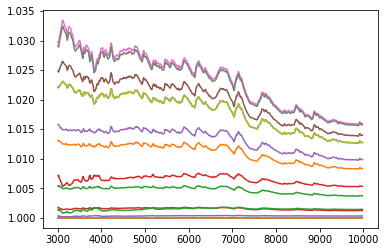

In [224]:
for i in range(len(contamination_factors)):
    plt.plot(wavelength, contamination_factors[i])
    # plt.show()


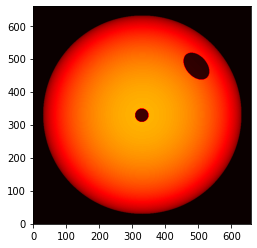

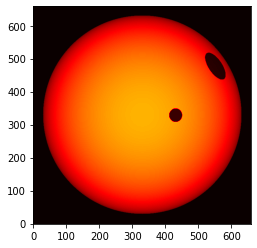

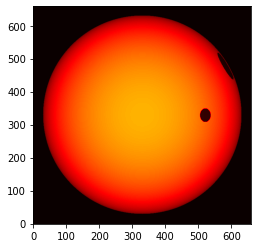

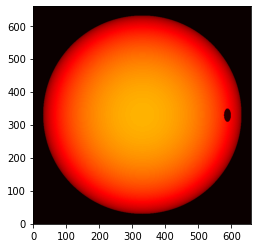

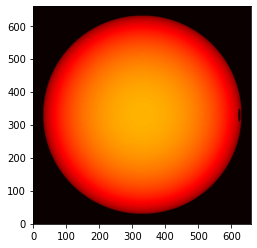

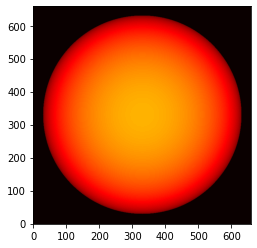

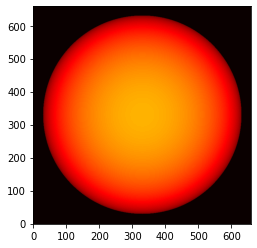

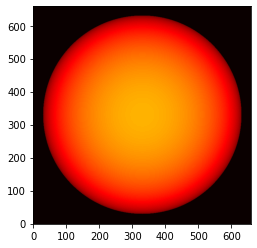

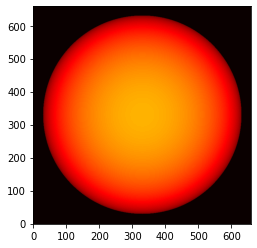

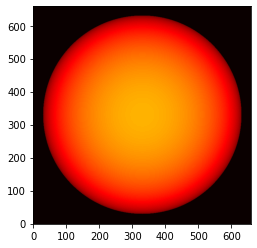

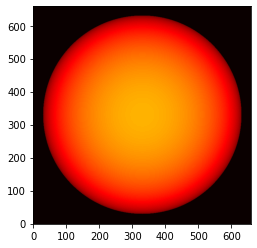

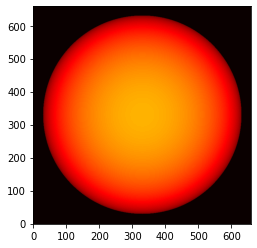

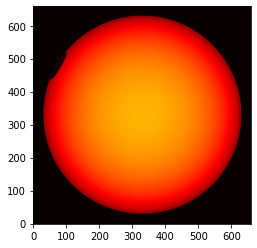

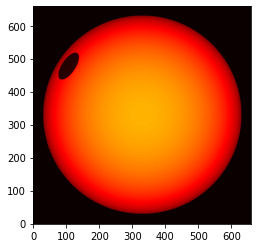

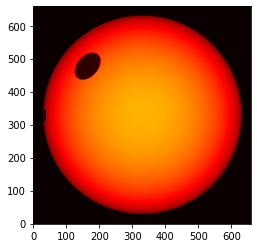

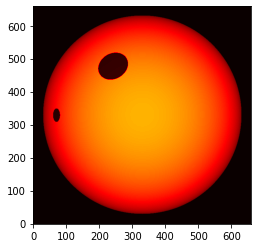

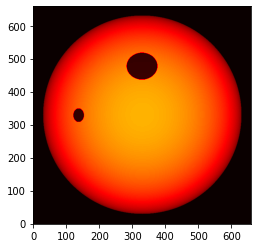

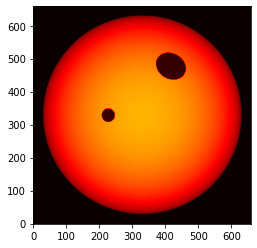

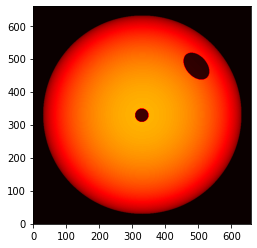

In [226]:
for i in range(len(star_maps)):
    plt.imshow(star_maps[i].T, cmap=cm.hot, origin='lower', vmin=0.0, vmax=1.)
    # plt.show()
